In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
dataset = pd.read_csv('d:/machine learning/pima_indian_data.csv')

In [15]:
dataset.head(2)


,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [16]:
dataset.describe(include='all')

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\tonyd\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\tonyd\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


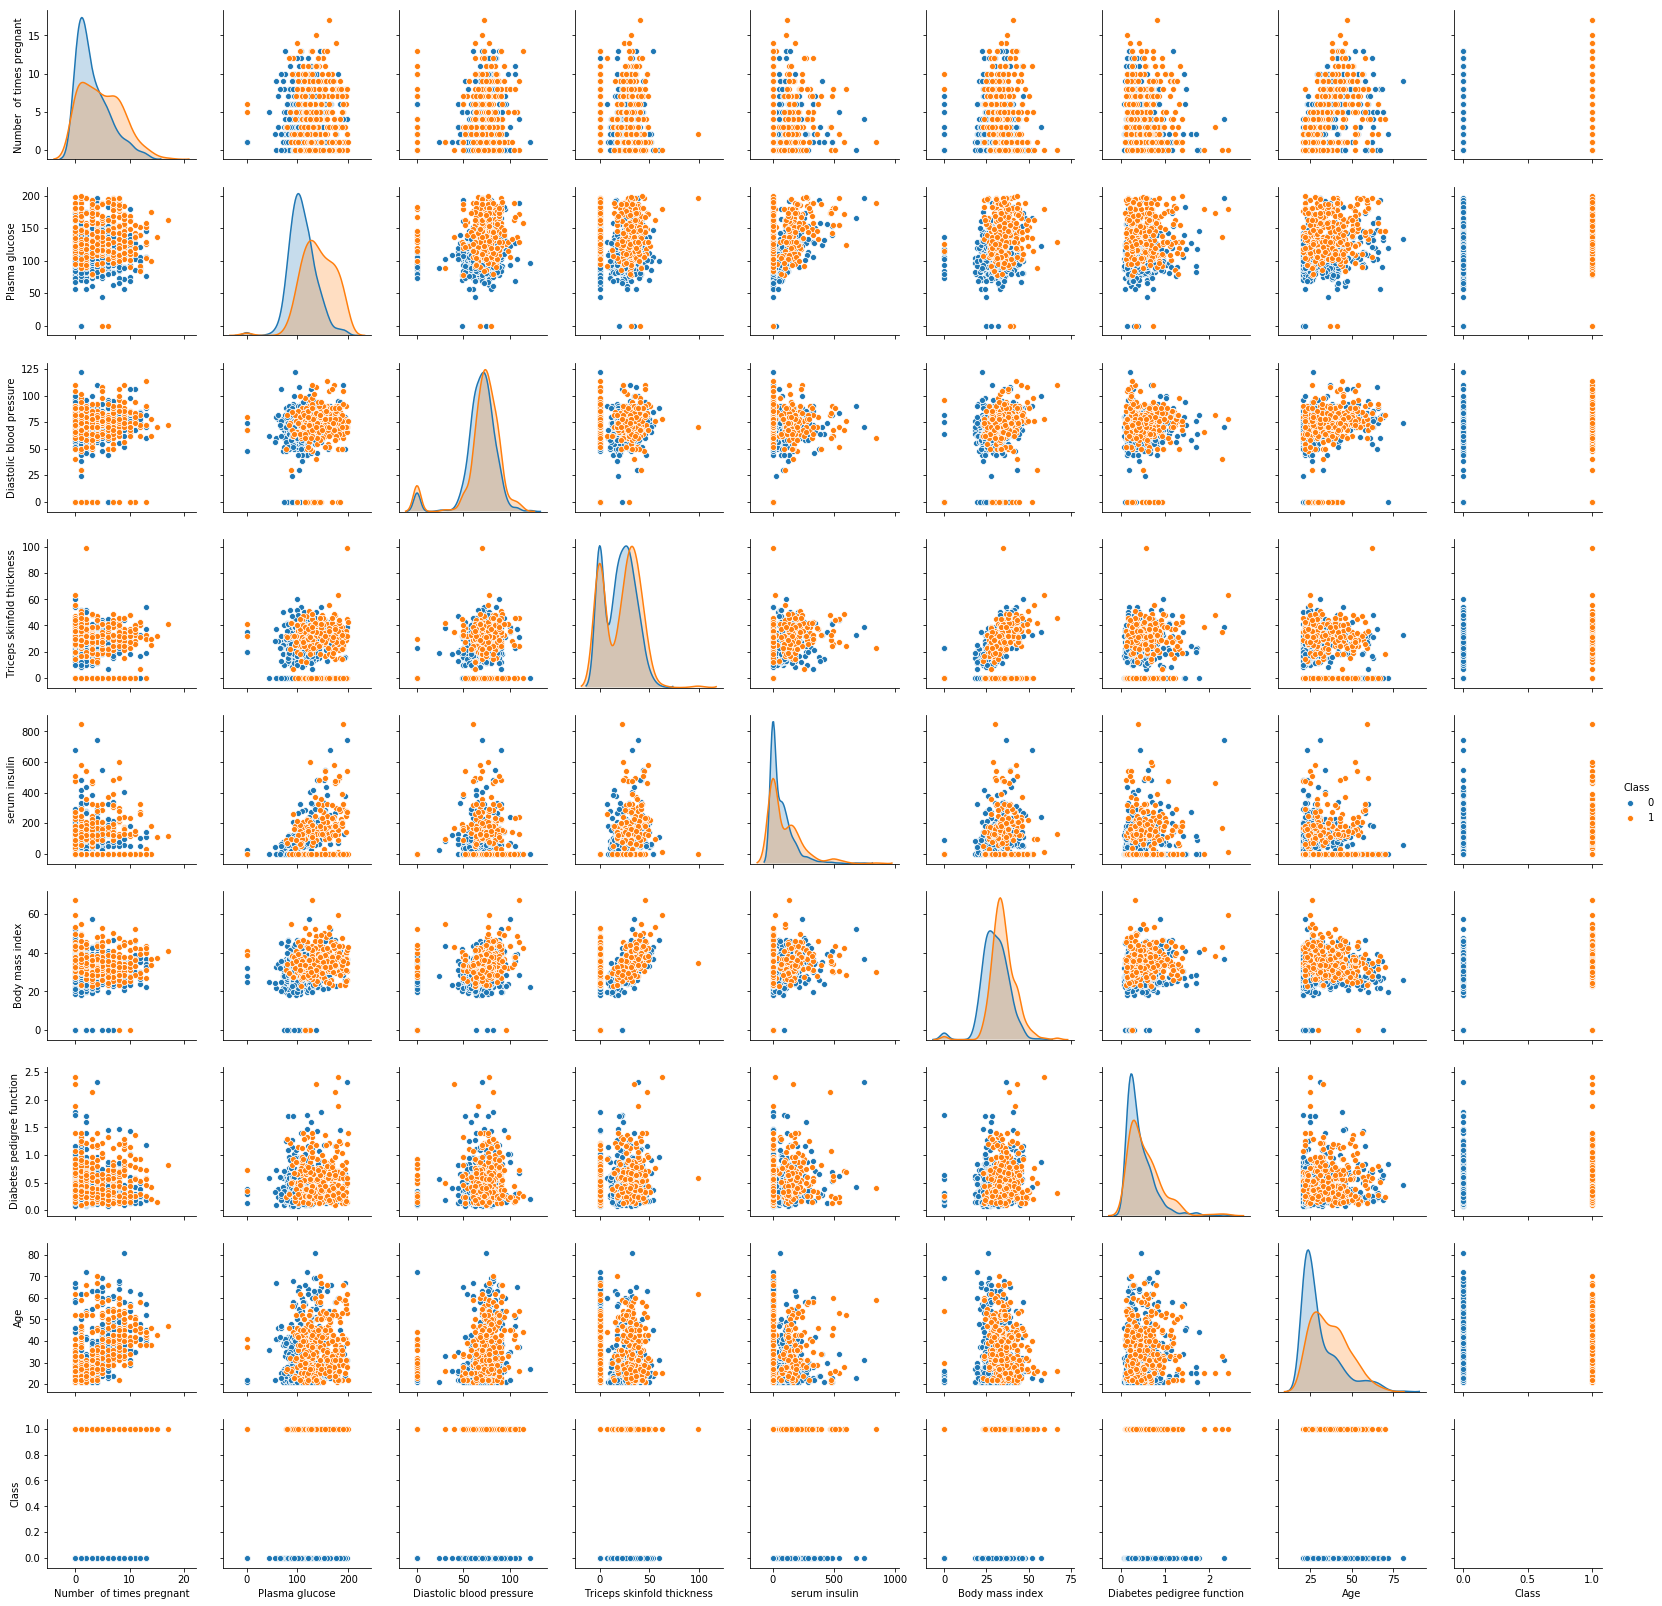

In [17]:
sns.pairplot(dataset, hue='Class')

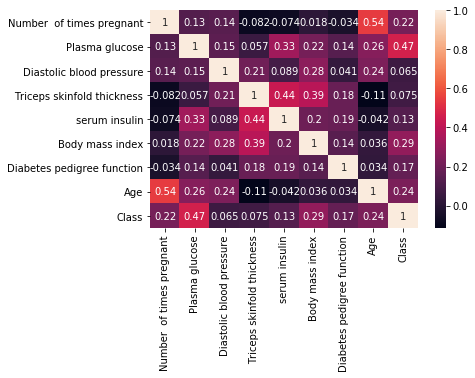

In [18]:
sns.heatmap(dataset.corr(), annot=True)

In [19]:
# creating input features and target variables
X= dataset.iloc[:,0:8]
y= dataset.iloc[:,8]

In [20]:
X.head(2)

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [21]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

C:\Users\tonyd\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tonyd\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
from keras import Sequential
from keras.layers import Dense

In [38]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=8))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [39]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [40]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
537/537 [==============================] - 0s 930us/step - loss: 0.6904 - acc: 0.6425
Epoch 2/50
537/537 [==============================] - 0s 74us/step - loss: 0.6812 - acc: 0.6555
Epoch 3/50
537/537 [==============================] - 0s 76us/step - loss: 0.6601 - acc: 0.6555
Epoch 4/50
537/537 [==============================] - 0s 76us/step - loss: 0.6180 - acc: 0.6629
Epoch 5/50
537/537 [==============================] - 0s 78us/step - loss: 0.5681 - acc: 0.7058
Epoch 6/50
537/537 [==============================] - 0s 76us/step - loss: 0.5307 - acc: 0.7523
Epoch 7/50
537/537 [==============================] - 0s 76us/step - loss: 0.5074 - acc: 0.7691
Epoch 8/50
537/537 [==============================] - 0s 76us/step - loss: 0.4931 - acc: 0.7505
Epoch 9/50
537/537 [==============================] - 0s 78us/step - loss: 0.4841 - acc: 0.7598
Epoch 10/50
537/537 [==============================] - 0s 74us/step - loss: 0.4776 - ac

In [41]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

537/537 [==============================] - 0s 86us/step


[0.43784924203901093, 0.7858473009237364]

In [42]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[129  19]
 [ 32  51]]
